In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_size = (128, 128)
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/training',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/testing',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary'
)


Found 8926 images belonging to 2 classes.
Found 610 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=10, validation_data=test_generator)
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

Epoch 1/10
279/279 [==============================] - 2151s 8s/step - loss: 0.6484 - accuracy: 0.6044 - val_loss: 0.6453 - val_accuracy: 0.5066
Epoch 2/10
279/279 [==============================] - 72s 259ms/step - loss: 0.5496 - accuracy: 0.7050 - val_loss: 0.5674 - val_accuracy: 0.6689
Epoch 3/10
279/279 [==============================] - 72s 258ms/step - loss: 0.4282 - accuracy: 0.7912 - val_loss: 0.5266 - val_accuracy: 0.6852
Epoch 4/10
279/279 [==============================] - 70s 253ms/step - loss: 0.3334 - accuracy: 0.8516 - val_loss: 0.5240 - val_accuracy: 0.6770
Epoch 5/10
279/279 [==============================] - 72s 258ms/step - loss: 0.2711 - accuracy: 0.8834 - val_loss: 0.5230 - val_accuracy: 0.7377
Epoch 6/10
279/279 [==============================] - 70s 253ms/step - loss: 0.2021 - accuracy: 0.9172 - val_loss: 0.6219 - val_accuracy: 0.6721
Epoch 7/10
279/279 [==============================] - 71s 255ms/step - loss: 0.1646 - accuracy: 0.9320 - val_loss: 0.5209 - val_acc

In [ ]:
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int)

20/20 [==============================] - 2s 117ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
true_labels = test_generator.classes
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(conf_matrix)
class_report = classification_report(true_labels, predicted_labels, target_names=['not_fractured', 'fractured'])
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[254 116]
 [172  68]]
Classification Report:
               precision    recall  f1-score   support

not_fractured       0.60      0.69      0.64       370
    fractured       0.37      0.28      0.32       240

     accuracy                           0.53       610
    macro avg       0.48      0.48      0.48       610
 weighted avg       0.51      0.53      0.51       610



1/1 [==============================] - 0s 213ms/step


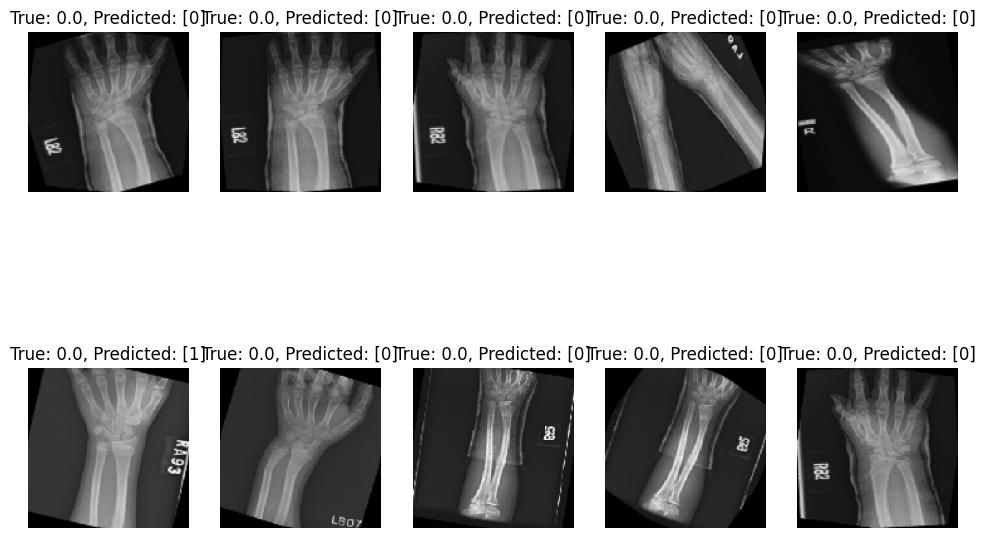

In [ ]:
import matplotlib.pyplot as plt
import random
test_images, true_labels = next(test_generator)
predicted_labels = (model.predict(test_images) > 0.5).astype(int)
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i])
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.show()

In [ ]:
import cv2

In [ ]:
image = cv2.imread('/content/drive/MyDrive/testing/fractured/1-rotated1-rotated1-rotated2.jpg')

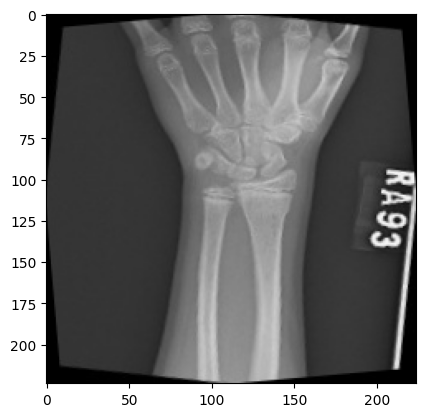

In [ ]:
plt.imshow(image)

In [ ]:
image.shape

(224, 224, 3)

In [ ]:
image = cv2.resize(image,(256,256))

In [ ]:
test_input = image.reshape((1,256,256,3))

In [ ]:
image.shape

(256, 256, 3)

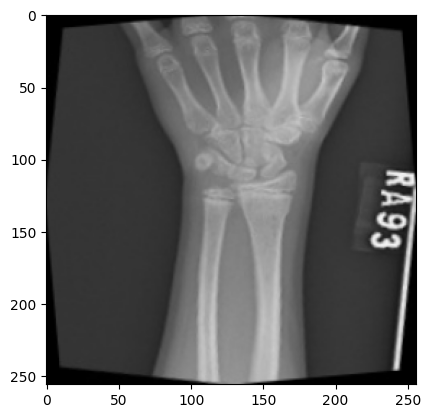

In [ ]:
plt.imshow(image)

In [ ]:
test_input = image.reshape((1,256,256,3))

In [ ]:
!pip install keras
import keras
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
!ls -l model

ls: cannot access 'model': No such file or directory


In [ ]:
!stat model

stat: cannot statx 'model': No such file or directory


In [ ]:
!file model

model: cannot open `model' (No such file or directory)


In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl


In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 1s/step


array([[[[0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.09999999],
         [0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.09999999],
         [0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.09999999],
         ...,
         [0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.09999999],
         [0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.09999999],
         [0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.09999999]],

        [[0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.09999999],
         [0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.09999999],
         [0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.09999999],
         ...,
         [0.09999999, 0.09999999, 0.09999999, ..., 0.09999999,
          0.09999999, 0.0